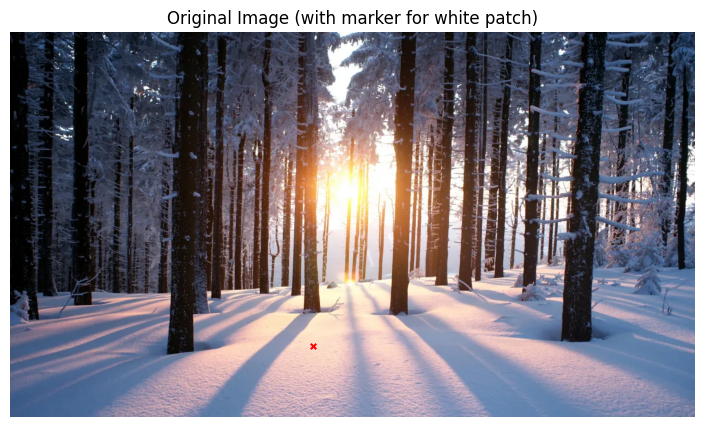

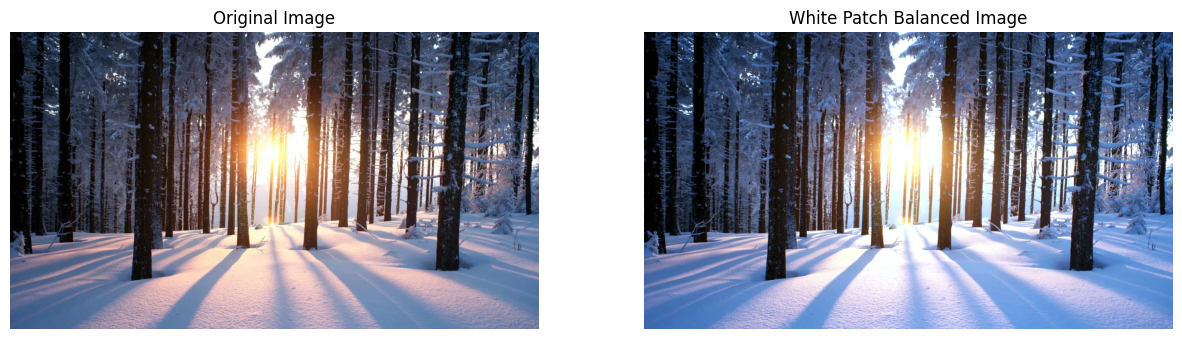

In [75]:
'''white patch'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]
img = cv2.imread('../../data/lesson_2/why-is-snow-white.webp')
if img is None:
    raise FileNotFoundError("Image file not found.")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
originalImage = img.copy()
'''coordinates of white pixel for color balancing'''
row, col = 550, 530

plt.imshow(originalImage)
plt.scatter([col], [row], c='red', s=15, marker='x')
plt.axis('off')
plt.title('Original Image (with marker for white patch)')
plt.show()

white = img[row, col, :]
coeffs = 255.0/white

balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.axis('off'), plt.title('Original Image')
plt.subplot(122), plt.imshow(balanced)
plt.axis('off'), plt.title('White Patch Balanced Image')
plt.show()

Mean R: 109.02286790123456, Mean G: 103.75182222222222, Mean B: 114.48037407407408
Channel means: [109.022865 103.75182  114.48038 ]
Coefficients - kr: 1.0500583618638941, kg: 1.1034059125137365, kb: 1.0
Applying coefficient 1.0500583618638941 to channel 0
Applying coefficient 1.1034059125137365 to channel 1
Applying coefficient 1.0 to channel 2


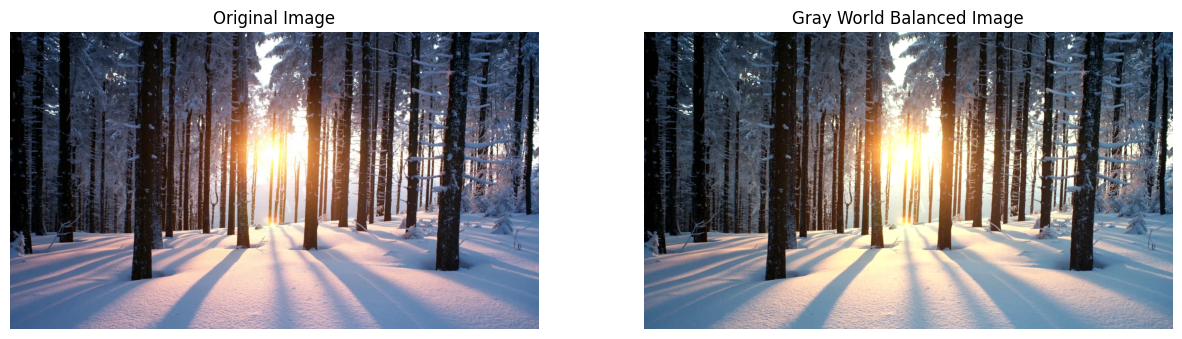

In [138]:
'''Gray world'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]
img = cv2.imread('../../data/lesson_2/why-is-snow-white.webp')
if img is None:
    raise FileNotFoundError("Image file not found.")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mean_r = np.mean(img[..., 0])
mean_g = np.mean(img[..., 1])
mean_b = np.mean(img[..., 2])

print(f"Mean R: {mean_r}, Mean G: {mean_g}, Mean B: {mean_b}")

means = np.array([mean_r, mean_g, mean_b], dtype=np.float32)

print(f"Channel means: {means}")
kr = mean_b / mean_r
kg = mean_b / mean_g
kb = 1.0

print(f"Coefficients - kr: {kr}, kg: {kg}, kb: {kb}")

balanced = np.zeros_like(img, dtype=np.float32)
for channel, k in zip(range(3), [kr, kg, kb]):
    print(f"Applying coefficient {k} to channel {channel}")
    balanced[..., channel] = img[..., channel] * k

'''make sure values are in [0, 1] range'''
balanced = np.clip(balanced/255, 0, 1)
plt.subplot(121), plt.imshow(img)
plt.axis('off'), plt.title('Original Image')
plt.subplot(122), plt.imshow(balanced)
plt.axis('off'), plt.title('Gray World Balanced Image')
plt.show()

Max R: 255, Max G: 255, Max B: 255
Applying coefficient 1.0 to channel 0, max value: 255
Applying coefficient 1.0 to channel 1, max value: 255
Applying coefficient 1.0 to channel 2, max value: 255


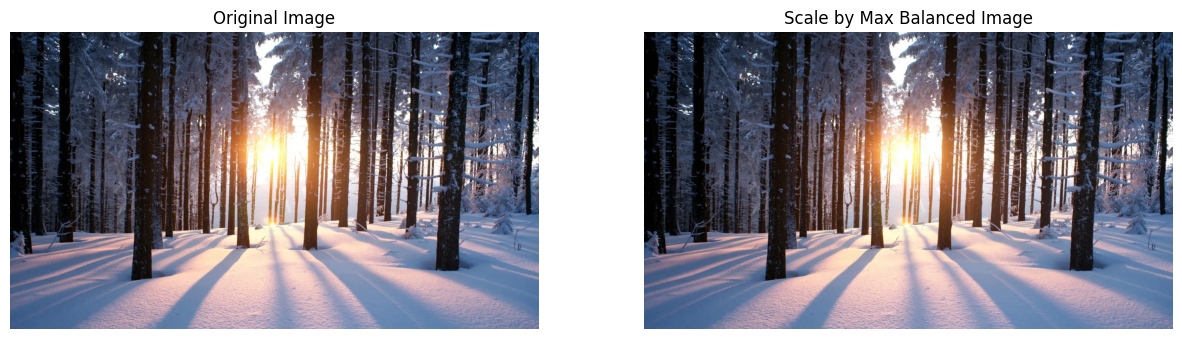

In [146]:
'''Scale by max'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]
img = cv2.imread('../../data/lesson_2/why-is-snow-white.webp')
if img is None:
    raise FileNotFoundError("Image file not found.")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

max_r = np.max(img[..., 0])
max_g = np.max(img[..., 1])
max_b = np.max(img[..., 2])

print(f"Max R: {max_r}, Max G: {max_g}, Max B: {max_b}")

balanced = np.zeros_like(img, dtype=np.float32)
for channel, maxValueForChannel in zip(range(3), [max_r, max_g, max_b]):
    '''make sure we don't divide by zero with np.clip, I start to love this function :)'''
    maxValueForChannel = np.clip(maxValueForChannel, 1, 255)
    coeffs = 255.0 / maxValueForChannel
    print(f"Applying coefficient {coeffs} to channel {channel}, max value: {maxValueForChannel}")
    balanced[..., channel] = img[..., channel] * coeffs

balanced = balanced/255
balanced = np.clip(balanced, 0, 1)
plt.subplot(121), plt.imshow(img)
plt.axis('off'), plt.title('Original Image')
plt.subplot(122), plt.imshow(balanced)
plt.axis('off'), plt.title('Scale by Max Balanced Image')
plt.show()